In [97]:
import pandas as pd
df1 = pd.DataFrame({'Name':['Ramya',"Anumula","Bhargavi","Trainer"],
                   "Salary":[30000,40000,50000,60000],
                   "Age":[25,23,30,50]})
df1

,Name,Salary,Age
0,Ramya,30000,25
1,Anumula,40000,23
2,Bhargavi,50000,30
3,Trainer,60000,50


In [99]:
df2 = pd.DataFrame({'Name':['Ramya',"Anumula_1","Bhargavi_1","Trainer"],
                   "Salary":[30000,40000,50000,60000],
                   "Age":[25,23,30,50],
                  "Roll_no":[1001,1002,1003,1004]})
df2

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,1001
1,Anumula_1,40000,23,1002
2,Bhargavi_1,50000,30,1003
3,Trainer,60000,50,1004


Concat function concatenates dataframes along rows or columns. We can think of it as stacking up multiple dataframes.

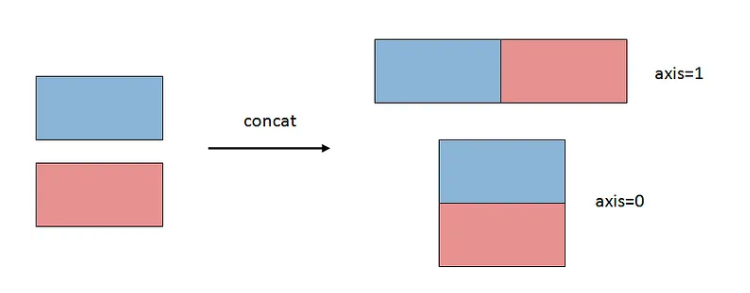

## concat()

In [4]:
df1

,Name,Salary,Age
0,Ramya,30000,25
1,Anumula,40000,23
2,Bhargavi,50000,30
3,Trainer,60000,50


In [5]:
df2

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,1001
1,Anumula_1,40000,23,1002
2,Bhargavi_1,50000,30,1003
3,Trainer,60000,50,1004


In [105]:
col_df = pd.concat([df1,df2],axis=0)
col_df

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,NaN
1,Anumula,40000,23,NaN
2,Bhargavi,50000,30,NaN
3,Trainer,60000,50,NaN
0,Ramya,30000,25,1001.0
1,Anumula_1,40000,23,1002.0
2,Bhargavi_1,50000,30,1003.0
3,Trainer,60000,50,1004.0


In [113]:
col_df.reset_index(drop=True,inplace=True)

In [115]:
col_df

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,NaN
1,Anumula,40000,23,NaN
2,Bhargavi,50000,30,NaN
3,Trainer,60000,50,NaN
4,Ramya,30000,25,1001.0
5,Anumula_1,40000,23,1002.0
6,Bhargavi_1,50000,30,1003.0
7,Trainer,60000,50,1004.0


In [8]:
col_df['Name']

,Name,Name
0,Ramya,Ramya
1,Anumula,Anumula_1
2,Bhargavi,Bhargavi_1
3,Trainer,Trainer


In [6]:
df1

,Name,Salary,Age
0,Ramya,30000,25
1,Anumula,40000,23
2,Bhargavi,50000,30
3,Trainer,60000,50


In [7]:
df2

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,1001
1,Anumula_1,40000,23,1002
2,Bhargavi_1,50000,30,1003
3,Trainer,60000,50,1004


In [10]:
row_df = pd.concat([df1,df2],axis=0)
row_df

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,NaN
1,Anumula,40000,23,NaN
2,Bhargavi,50000,30,NaN
3,Trainer,60000,50,NaN
0,Ramya,30000,25,1001.0
1,Anumula_1,40000,23,1002.0
2,Bhargavi_1,50000,30,1003.0
3,Trainer,60000,50,1004.0


In [12]:
row_df.reset_index(drop=True,inplace= True)

In [14]:
row_df

,Name,Salary,Age,Roll_no
0,Ramya,30000,25,NaN
1,Anumula,40000,23,NaN
2,Bhargavi,50000,30,NaN
3,Trainer,60000,50,NaN
4,Ramya,30000,25,1001.0
5,Anumula_1,40000,23,1002.0
6,Bhargavi_1,50000,30,1003.0
7,Trainer,60000,50,1004.0


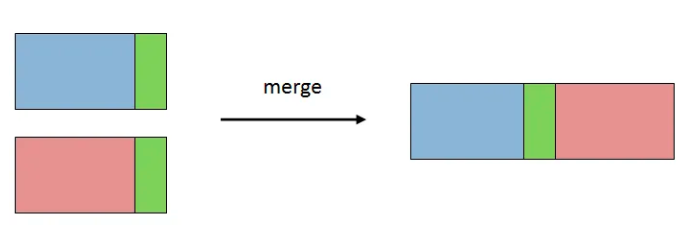

## merge()
Merge combines dataframes based on values in shared columns. Merge function offers more flexibility compared to concat function because it allows combinations based on a condition.

In [5]:
import numpy as np
import pandas as pd
prod= pd.DataFrame({'prodid':[1,2,3,4,5],
                    'prodname':['pen','pencil',"book","furniture","waterbottle"],
                    'custid':[100,200,300,100,np.nan]})
prod

,prodid,prodname,custid
0,1,pen,100.0
1,2,pencil,200.0
2,3,book,300.0
3,4,furniture,100.0
4,5,waterbottle,NaN


In [3]:
cust = pd.DataFrame({'custid':[100,200,300,400],
                     'custname':["rajkiran","dileep","venkatesh","ramya"],
                   'age':[18,20,21,19],
                    'Gender':['m','m','m','f']})
cust

,custid,custname,age,Gender
0,100,rajkiran,18,m
1,200,dileep,20,m
2,300,venkatesh,21,m
3,400,ramya,19,f


In [7]:
# who are those customers names who are making any purchases
pd.merge(cust,prod,on='custid',how='inner')

,custid,custname,age,Gender,prodid,prodname
0,100,rajkiran,18,m,1,pen
1,100,rajkiran,18,m,4,furniture
2,200,dileep,20,m,2,pencil
3,300,venkatesh,21,m,3,book


In [13]:
ans= pd.merge(cust,prod,on='custid',how='left')
ans

,custid,custname,age,Gender,prodid,prodname
0,100,rajkiran,18,m,1.0,pen
1,100,rajkiran,18,m,4.0,furniture
2,200,dileep,20,m,2.0,pencil
3,300,venkatesh,21,m,3.0,book
4,400,ramya,19,f,NaN,NaN


In [25]:
# who are those customers who are not making any purchases
ans.loc[ans['prodid'].isnull(),'custname']

4    ramya
Name: custname, dtype: object

In [39]:
ans =pd.merge(prod,cust,how="left",on="custid")
ans1= pd.merge(cust,prod,how='right',on='custid')

In [41]:
ans

,prodid,prodname,custid,custname,age,Gender
0,1,pen,100.0,rajkiran,18.0,m
1,2,pencil,200.0,dileep,20.0,m
2,3,book,300.0,venkatesh,21.0,m
3,4,furniture,100.0,rajkiran,18.0,m
4,5,waterbottle,NaN,NaN,NaN,NaN


In [43]:
ans1

,custid,custname,age,Gender,prodid,prodname
0,100.0,rajkiran,18.0,m,1,pen
1,200.0,dileep,20.0,m,2,pencil
2,300.0,venkatesh,21.0,m,3,book
3,100.0,rajkiran,18.0,m,4,furniture
4,NaN,NaN,NaN,NaN,5,waterbottle


In [29]:
ans =pd.merge(cust,prod,how="right",on="custid")
ans

,custid,custname,age,Gender,prodid,prodname
0,100.0,rajkiran,18.0,m,1,pen
1,200.0,dileep,20.0,m,2,pencil
2,300.0,venkatesh,21.0,m,3,book
3,100.0,rajkiran,18.0,m,4,furniture
4,NaN,NaN,NaN,NaN,5,waterbottle


In [31]:
# what are those products which is not being purchased by any customers
ans[ans['custid'].isnull()]

,custid,custname,age,Gender,prodid,prodname
4,NaN,NaN,NaN,NaN,5,waterbottle


In [33]:
ans =pd.merge(prod,cust,how="left",on="custid")
ans

,prodid,prodname,custid,custname,age,Gender
0,1,pen,100.0,rajkiran,18.0,m
1,2,pencil,200.0,dileep,20.0,m
2,3,book,300.0,venkatesh,21.0,m
3,4,furniture,100.0,rajkiran,18.0,m
4,5,waterbottle,NaN,NaN,NaN,NaN


In [35]:
ans[ans['custid'].isnull()]

,prodid,prodname,custid,custname,age,Gender
4,5,waterbottle,NaN,NaN,NaN,NaN


In [19]:
# who are those customers who are not making any purchases

# we want to all the products information which might or might not have customers
# ( if the products with customers display their details)
# (if the products are not purchased with customers still display the product but not the details)

ans1 =pd.merge(cust,prod,how="left",on="custid")
ans1

,custid,custname,age,Gender,prodid,prodname
0,100,rajkiran,18,m,1.0,pen
1,100,rajkiran,18,m,4.0,furniture
2,200,dileep,20,m,2.0,pencil
3,300,venkatesh,21,m,3.0,book
4,400,ramya,19,f,NaN,NaN


In [23]:
ans1[ans1['prodid'].isnull()]['custname']

4    ramya
Name: custname, dtype: object

In [22]:
ans1.loc[ans1['prodid'].isnull(),'custname']

4    ramya
Name: custname, dtype: object

In [20]:
# products which have not been purchased with any customers
temp = pd.merge(cust,prod,how="right",on="custid")
temp

,custid,custname,age,Gender,prodid,prodname
0,100.0,rajkiran,18.0,m,1,pen
1,200.0,dileep,20.0,m,2,pencil
2,300.0,venkatesh,21.0,m,3,book
3,100.0,rajkiran,18.0,m,4,furniture
4,NaN,NaN,NaN,NaN,5,waterbottle


In [22]:
temp[temp['custid'].isnull()]['prodname']

4    waterbottle
Name: prodname, dtype: object

In [33]:
temp[temp['custid'].isnull()]['prodname']

4    waterbottle
Name: prodname, dtype: object

In [34]:
df['custname'].unique()

array(['rajkiran', 'dileep', 'venkatesh'], dtype=object)

In [76]:
prod

,prodid,prodname,custid
0,1,pen,100.0
1,2,pencil,200.0
2,3,book,300.0
3,4,furniture,100.0
4,5,waterbottle,NaN


In [77]:
cust

,custid,custname,age,Gender
0,100,rajkiran,18,m
1,200,dileep,20,m
2,300,venkatesh,21,m
3,400,ramya,19,f


In [95]:
pd.merge(cust,prod,how='outer',on='custid')

,custid,custname,age,Gender,prodid,prodname
0,100.0,rajkiran,18.0,m,1.0,pen
1,100.0,rajkiran,18.0,m,4.0,furniture
2,200.0,dileep,20.0,m,2.0,pencil
3,300.0,venkatesh,21.0,m,3.0,book
4,400.0,ramya,19.0,f,NaN,NaN
5,NaN,NaN,NaN,NaN,5.0,waterbottle


In [80]:
pd.merge(cust,prod,how='cross')

,custid_x,custname,age,Gender,prodid,prodname,custid_y
0,100,rajkiran,18,m,1,pen,100.0
1,100,rajkiran,18,m,2,pencil,200.0
2,100,rajkiran,18,m,3,book,300.0
3,100,rajkiran,18,m,4,furniture,100.0
4,100,rajkiran,18,m,5,waterbottle,NaN
5,200,dileep,20,m,1,pen,100.0
6,200,dileep,20,m,2,pencil,200.0
7,200,dileep,20,m,3,book,300.0
8,200,dileep,20,m,4,furniture,100.0
9,200,dileep,20,m,5,waterbottle,NaN


In [87]:
#task
d1=pd.DataFrame({
    "a":["a1","a2","a1","a3"],
    "b":["b1","b2","b3","b4"],
    "c":["c1","c2","c3","c4"]
})
d2=pd.DataFrame({
    "a":["a1","a2","a5"],
    "x":["x1","x2","x5"],
    "y":["y1","y2","y5"]
})
# column a-- apply inner join using pen paper

In [89]:
d1

,a,b,c
0,a1,b1,c1
1,a2,b2,c2
2,a1,b3,c3
3,a3,b4,c4


In [91]:
d2

,a,x,y
0,a1,x1,y1
1,a2,x2,y2
2,a5,x5,y5


In [ ]:
# perform left and right later

In [93]:
pd.merge(d1,d2,how="inner",on="a")

,a,b,c,x,y
0,a1,b1,c1,x1,y1
1,a2,b2,c2,x2,y2
2,a1,b3,c3,x1,y1


In [50]:
pd.merge(d1,d2,how="right",on="a")

,a,b,c,x,y
0,a1,b1,c1,x1,y1
1,a1,b3,c3,x1,y1
2,a2,b2,c2,x2,y2
3,a5,NaN,NaN,x5,y5


# daily task

In [47]:
jntu_branch = pd.DataFrame({'empid':[100,101,102,103],
                    'Name':['Ramya',"Anumula","Bhargavi","Nagaraju"],
                   "Salary":[300,400,500,600]})
jntu_branch

,empid,Name,Salary
0,100,Ramya,300
1,101,Anumula,400
2,102,Bhargavi,500
3,103,Nagaraju,600


In [49]:
gachibowli_branch = pd.DataFrame({ 'empid' : [100,105,110,103],
                    'Name':['Ramya',"ram","abhi","nagaraju"],
                   "Salary":[300,400,500,600]})
gachibowli_branch

,empid,Name,Salary
0,100,Ramya,300
1,105,ram,400
2,110,abhi,500
3,103,nagaraju,600


In [51]:
hitech_branch = pd.DataFrame({ 'empid' : [101,120,125,103],
                    'Name':['Anumula',"swetha","laxmi","nagaraju"],
                   "Salary":[300,400,500,600]})
hitech_branch

,empid,Name,Salary
0,101,Anumula,300
1,120,swetha,400
2,125,laxmi,500
3,103,nagaraju,600


In [61]:
# task1: get the total salary of people who are working in both hitech_branch and gachibowli_branch


ans= pd.merge(hitech_branch,gachibowli_branch,how='inner',on='empid')
ans['tot_sal'] = ans['Salary_x'] + ans['Salary_y']
ans[['Name_x','tot_sal']]

,Name_x,tot_sal
0,nagaraju,1200


In [65]:
# task2 : # get the total salary of people who are not working in hitech_branch but working in jntu
ans= pd.merge(jntu_branch,hitech_branch,how='left',on='empid')
ans

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,Ramya,300,NaN,NaN
1,101,Anumula,400,Anumula,300.0
2,102,Bhargavi,500,NaN,NaN
3,103,Nagaraju,600,nagaraju,600.0


In [71]:
r= ans[ans['Name_y'].isnull()]
r

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,Ramya,300,NaN,NaN
2,102,Bhargavi,500,NaN,NaN


In [73]:
r['Salary_x'].sum()

800

In [75]:
# task3 : # get the total salary of people who are working in gachibowli but not in jntu

res=pd.merge(gachibowli_branch,jntu_branch,on="empid",how="left")
res

,empid,Name_x,Salary_x,Name_y,Salary_y
0,100,Ramya,300,Ramya,300.0
1,105,ram,400,NaN,NaN
2,110,abhi,500,NaN,NaN
3,103,nagaraju,600,Nagaraju,600.0


In [81]:
x= res[res['Name_y'].isnull()]
x

,empid,Name_x,Salary_x,Name_y,Salary_y
1,105,ram,400,NaN,NaN
2,110,abhi,500,NaN,NaN


In [83]:
x['Salary_x'].sum()

900